# Fashion MNIST

In [1]:
# 패키지 로드
import sys, warnings
# if sys.platform == 'linux':
#     sys.path.append("/home/yjg1005/nas/Python/Mega_IT")    
# else:
#     sys.path.append("Y:\Python\Mega_IT")
warnings.filterwarnings('ignore')

# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *
# from yjk_module.dl_module import *

import os, sys
# if sys.platform == 'linux':
#     os.chdir("/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning")
# else:
#     os.chdir("Y:\Python\Mega_IT\H.Deep_Learning")

# from hossam.util import *
# from hossam.plot import *
# from hossam.tensor import *
# from hossam.classification import *

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, BatchNormalization, Activation, ConvLSTM2D
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback, History
from keras.utils import to_categorical

from tensorflow.keras.datasets.fashion_mnist import load_data

2024-04-24 13:29:41.521234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 13:29:41.521261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 13:29:41.521901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 13:29:41.525457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 13:29:41.997247: W tensorflow/compiler/tf2

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = load_data()
print(f"훈련 데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증 데이터 {x_test.shape} 레이블 {y_test.shape}")

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


In [3]:
# 클래스명 지정
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [4]:
# 종속변수 OneHotEncoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# 훈련데이터 reshape
x_train_reshape = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(f"훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_test_reshape.shape}")

훈련 데이터 (60000, 28, 28, 1) / 검증 데이터 (10000, 28, 28, 1)


In [6]:
# CNN 모델 구현
model = Sequential([
    Conv2D(32, kernel_size = (5, 5), input_shape = (28, 28, 1), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    Dropout(0.05),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(10),
    BatchNormalization(),
    Activation('softmax')
])

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

2024-04-24 13:29:48.273952: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


In [7]:
%%time
# 모델 훈련

history = model.fit(x_train_reshape, y_train_one_hot, validation_data = (x_test_reshape, y_test_one_hot), epochs = 1000, callbacks = [
    EarlyStopping(patience = 8, restore_best_weights = True)
])

Epoch 1/1000


2024-04-24 13:29:57.915174: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-24 13:29:58.000646: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-24 13:29:58.083711: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 13:29:58.182691: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 13:29:58.872818: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3ecacb9da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 13:29:58.872834: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 30

1875/1875 [==============================] - 9s 4ms/step - loss: 0.5153 - acc: 0.8592 - val_loss: 0.3113 - val_acc: 0.8929
Epoch 2/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3213 - acc: 0.8987 - val_loss: 0.2672 - val_acc: 0.9077
Epoch 3/1000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2670 - acc: 0.9118 - val_loss: 0.2568 - val_acc: 0.9098
Epoch 4/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2306 - acc: 0.9224 - val_loss: 0.2911 - val_acc: 0.8955
Epoch 5/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2021 - acc: 0.9309 - val_loss: 0.2596 - val_acc: 0.9092
Epoch 6/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1837 - acc: 0.9374 - val_loss: 0.2355 - val_acc: 0.9187
Epoch 7/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1654 - acc: 0.9442 - val_loss: 0.2546 - val_acc: 0.9114
Epoch 8/1000
1875/1875 [==============================] - 6s 

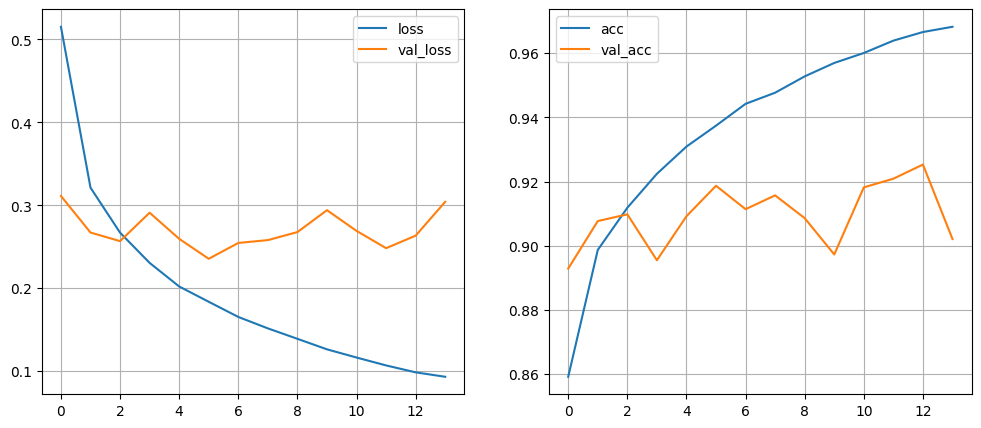

In [8]:
# 학습곡선 확인
# yjk_dl_history_plot(history, 'acc')

hist_dict = history.history

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].grid()
ax[0].legend()

ax[1].plot(hist_dict['acc'], label = 'acc')
ax[1].plot(hist_dict['val_acc'], label = 'val_acc')
ax[1].grid()
ax[1].legend()

plt.show()

In [9]:
# 훈련 모델에서 단일 CNN 층만 추출
model_1 = keras.Model(model.input, model.layers[0].output)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
Total params: 832 (3.25 KB)
Trainable params: 832 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 샘플 데이터 층 통과
f_map = model_1.predict(x_train_reshape[0])
f_map.shape

1/1 [==============================] - 0s 58ms/step


(28, 28, 1, 32)

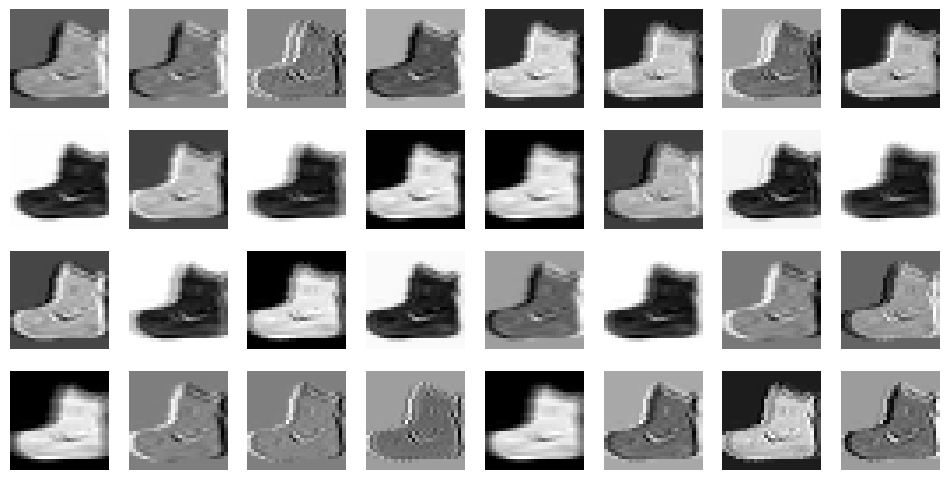

In [11]:
# 통과시킨 데이터의 시각화

f_map = f_map[:, :, 0, :]

fig, ax = plt.subplots(4, 8, figsize = (12, 6))
ax = ax.flatten()

for i in range(32):
    ax[i].imshow(f_map[:, :, i], cmap = 'gray')
    ax[i].axis('off')

plt.show()